 <img src="https://eant.tech/imagenes/logo.png" width=25% height=80%  >

### <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio de  comercio exterior 🚢🚢🚢

<br>

<center>

![redes](https://www.supplychain247.com/images/article/map_shipping_routes.jpg)

</center>

Vamos a analizar datos de **comercio exterior**. Siempre al hablar de grafos necesitamos bases con esa estructura de orígen y destino (source y target). En este caso, nuestro orígen es el país de orígen de cierto producto de exportación y el destino es el país destino de dicha exportación (importador). 

La idea es poder responder preguntas como: 
- Cómo se vinculan los países en términos comerciales?
- Qué países actuan como nodos centrales en base a distinas métricas de centralidad?

Se les ocurren otras preguntas que podríamos responder?

✏️ 1. Importar los paquetes que vamos a utilizar para este ejercicio

In [1]:
#!pip install networkx

In [2]:
import pandas as pd
import numpy as np
import networkx as nx 
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.float_format', lambda x: '%.2f' % x)


Los datos que vamos a utilizar en este ejercicio fueron obtenidos de [Open Trade Statistics](https://tradestatistics.io/)

Variable | Descripción
--|--
reporter | País de orígen de la exportación
partner | País destino de la exportación
section | Tipo de exportación
export_value_usd | Valor de la exportación en dólares
continent_reporter | Continente del país de orígen
continent_partner | continente del país de destino

✏️ 2. Importar los datos que estane en el siguiente link:

In [3]:
link='https://docs.google.com/spreadsheets/d/e/2PACX-1vRBmIJHcntxdXp5Gasix33CH3JNad7eIEr8SPks2cC6Ka1bh2mLCUenFj9UoQWAYWKFEiDBFhH8ev2o/pub?gid=966870988&single=true&output=csv'

In [4]:
df=pd.read_csv(link)

In [5]:
df.head()

,reporter,partner,section,export_value_usd,continent_reporter,continent_partner
0,Afghanistan,Albania,Unspecified,42832,Asia,Europe
1,Afghanistan,United Arab Emirates,Unspecified,2485266,Asia,Asia
2,Afghanistan,Argentina,Chemical Products,8388,Asia,Americas
3,Afghanistan,Argentina,Plastics and Rubbers,155,Asia,Americas
4,Afghanistan,Argentina,Textiles,1017,Asia,Americas


✏️ 3. Cuantas exportaciónes hay disponibles en este conjunto de datos?

In [6]:
print('La cantidad de exportaciones que hay es',df.shape[0])

La cantidad de exportaciones que hay es 134512



----------

### Análisis exploratorio de los datos

✏️ 1. ¿Cuáles son los países con más destinos de exportación?

In [7]:
df.reporter.value_counts(normalize=True)

China                                          0.02
Italy                                          0.02
Germany                                        0.02
United Kingdom                                 0.02
India                                          0.02
                                               ... 
Bouvet Island                                  0.00
Saint Pierre and Miquelon                      0.00
South Georgia and the South Sandwich Islands   0.00
Heard Island and McDonald Islands              0.00
Neth. Antilles                                 0.00
Name: reporter, Length: 226, dtype: float64

✏️ 2. ¿Cuáles son los países que reciben más exportaciones de distintos países?

In [10]:
df.groupby('partner',as_index=False)['reporter'].count().sort_values('reporter',ascending=False).head(10)

,partner,reporter
111,Kuwait,1589
14,Bahrain,1368
5,Angola,1316
82,Ghana,1225
146,Nigeria,1190
179,Seychelles,1176
21,Bermuda,1149
132,Montenegro,1136
209,Uganda,1130
12,Azerbaijan,1124


--------------
### Creación de un grafo como objeto

🕸️ Vamos a crear un breve ejemplo manualmente para entender cómo funciona la librería **networkx**. Luego vamos a pasar a crear un grafo a partir de nuestro df de comercio.

✏️ 1. Creamos el objeto con nx.Graph()

In [12]:
red=nx.Graph()
red

✏️ 2. Si observamos las exporactiones de productos quimicos algunos de los paises que realizan exporataciones por mayores importes son:
[ 'USA', 'Canada', 'China', 'Thailand', 'Mexico', 'United Kingdom', 'France', 'Germany', 'Singapore' ] 
Por lo cual agregemos estos nodos a nuestra red:

In [13]:
red.add_nodes_from( [ 'USA', 'Canada', 'China', 'Thailand', 'Mexico', 'United Kingdom', 'France', 'Germany', 'Singapore' ] )

✏️ 3. Visualizamos la red colocando la denominación de cada pais y el color de cada node sea node_color #b2ffff

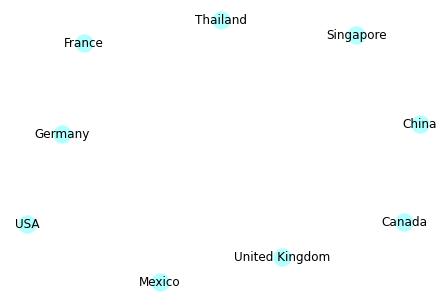

In [16]:
nx.draw(red,with_labels=True,node_color='#b2ffff')

✏️ 4.  Añadimos enlaces entre los vértices y visualizamos las siguientes relaciones:

Reporter    | partner
------------|---------
'USA'|'Canada'
'USA'|'China' 
'USA'|'Thailand'
'USA'|'Mexico'
'United Kingdom'|'France'
'United Kingdom'|'Canada'
'United Kingdom'|'Germany'
'China'|'Singapore'
'Singapore'|	'Thailand'	


In [17]:
red.add_edge('USA','Canada')
red.add_edge('USA','China' )
red.add_edge('USA','Thailand')
red.add_edge('USA','Mexico')
red.add_edge('United Kingdom','France')
red.add_edge('United Kingdom','Canada')
red.add_edge('United Kingdom','Germany')
red.add_edge('China','Singapore')
red.add_edge('Singapore',	'Thailand')

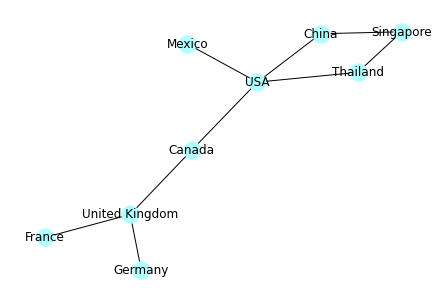

In [18]:
nx.draw(red,with_labels=True,node_color='#b2ffff')

✏️ 5.  Hacemos lo mismo que en el caso anterior pero con un grafo dirigido: DiGraph(), en donde tenemos flechas que indican hacia dónde va la conexión:

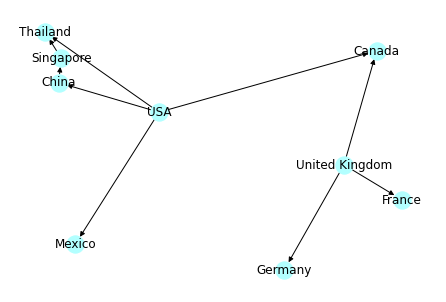

In [20]:
# Paso 1
red=nx.DiGraph()

# Paso 2
red.add_nodes_from( [ 'USA', 'Canada', 'China', 'Thailand', 'Mexico', 'United Kingdom', 'France', 'Germany', 'Singapore' ] )

# Paso 3
red.add_edge('USA','Canada')
red.add_edge('USA','China' )
red.add_edge('USA','Thailand')
red.add_edge('USA','Mexico')
red.add_edge('United Kingdom','France')
red.add_edge('United Kingdom','Canada')
red.add_edge('United Kingdom','Germany')
red.add_edge('China','Singapore')
red.add_edge('Singapore',	'Thailand')

#Paso 4
nx.draw(red,with_labels=True,node_color='#b2ffff')

✏️ 6.  En base al grafo generado calcular:
* Degree
* Out Degree
* In Degree

<center>

![](https://i.ibb.co/zRb2qcC/grafos-1.png)

</center>

In [21]:
red.degree()

DiDegreeView({'USA': 4, 'Canada': 2, 'China': 2, 'Thailand': 2, 'Mexico': 1, 'United Kingdom': 3, 'France': 1, 'Germany': 1, 'Singapore': 2})

In [22]:
red.out_degree()

OutDegreeView({'USA': 4, 'Canada': 0, 'China': 1, 'Thailand': 0, 'Mexico': 0, 'United Kingdom': 3, 'France': 0, 'Germany': 0, 'Singapore': 1})

In [23]:
red.in_degree()

InDegreeView({'USA': 0, 'Canada': 2, 'China': 1, 'Thailand': 2, 'Mexico': 1, 'United Kingdom': 0, 'France': 1, 'Germany': 1, 'Singapore': 1})

✏️ 7. Ahora vamos a trabajar con todos los dastos importados en el primer ejercicio, por lo cual generar un grafo a partir de nuestros datos. 

* La variable de orígen (source) es el país que reporta (orígen de la exportación). 
* La variable de destino (target) es el país receptor de esas exportaciones (partner o socio comercial). 

Lo vamos a crear utilizando la función nx.DiGraph() para que sea dirigido. Por notación verán que en general en casi todas las librerías de grafos suelen denominar al grafo como G. 

<center>

![](https://i.ibb.co/h9Y7vMP/grafos.png)

</center>

In [27]:
G=nx.from_pandas_edgelist(
                            df,
                            source='reporter',
                            target='partner',
                            create_using=nx.DiGraph()
                            )
G

✏️ 8. Obtener el grado (métrica de centralidad) para cada uno de los vértices (países) de nuestro grafo (G). Transformarlo a dataframe y verificar cuál es el país con mayor grado. 

In [29]:
G.degree()['Argentina']

333

In [30]:
G.degree()

DiDegreeView({'Afghanistan': 223, 'Albania': 327, 'United Arab Emirates': 392, 'Argentina': 333, 'Armenia': 267, 'Australia': 397, 'Austria': 395, 'Azerbaijan': 265, 'Burundi': 216, 'Belgium': 391, 'Benin': 240, 'Burkina Faso': 256, 'Bulgaria': 351, 'Bahrain': 339, 'Bosnia Herzegovina': 336, 'Belarus': 325, 'Bolivia': 311, 'Brazil': 358, 'Barbados': 284, 'Brunei Darussalam': 270, 'Botswana': 239, 'Canada': 418, 'Switzerland': 397, 'Chile': 344, 'China': 412, "Cote d'Ivoire": 324, 'Colombia': 368, 'Costa Rica': 326, 'Cyprus': 339, 'Czech Rep.': 390, 'Germany': 430, 'Denmark': 405, 'Ecuador': 343, 'Egypt': 327, 'Spain': 383, 'Estonia': 352, 'Finland': 387, 'Fiji': 280, 'France': 431, 'United Kingdom': 427, 'Georgia': 273, 'Ghana': 319, 'Greece': 358, 'Greenland': 184, 'China, Hong Kong SAR': 382, 'India': 370, 'Ireland': 397, 'Iran': 203, 'Iraq': 174, 'Iceland': 302, 'Israel': 315, 'Italy': 391, 'Jordan': 294, 'Japan': 405, 'Kazakhstan': 287, 'Kenya': 331, 'Kyrgyzstan': 236, 'Rep. of Kor

In [35]:
df_degree=pd.DataFrame(G.degree(),columns=['Pais','Degree'])

In [34]:
(
    pd.DataFrame(G.degree(),columns=['Pais','Degree'])
      .sort_values('Degree',ascending=False)
      .head(3)
)

,Pais,Degree
103,USA,435
38,France,431
30,Germany,430


In [ ]:
(
    pd.DataFrame(G.out_degree(),columns=['Pais','Degree'])
      .sort_values('Degree',ascending=False)
      .head(3)
)

✏️ 9. Graficar la distribución de grado

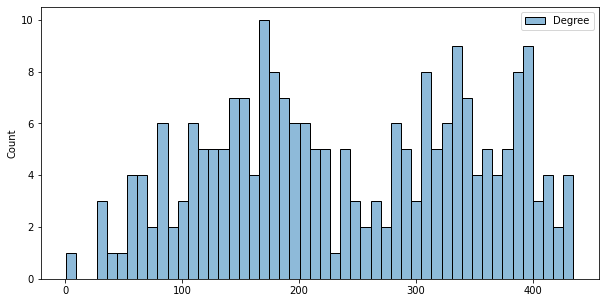

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df_degree,bins=50)
plt.show()

✏️ 10. ¿Cual es el pais que tiene mayor grado?

In [44]:
print('El pais con mayor grado es',(
    pd.DataFrame(G.degree(),columns=['Pais','Degree'])
      .sort_values('Degree',ascending=False)
      .head(1)
      .Pais
      .values[0]
))

El pais con mayor grado es USA


✏️ 11. Calcular el outdegree centrality (centralidad en términos de exportaciones) :

In [45]:
print('El pais con mayor out degree es',(
    pd.DataFrame(G.out_degree(),columns=['Pais','Degree'])
      .sort_values('Degree',ascending=False)
      .head(1)
      .Pais
      .values[0]
))

El pais con mayor out degree es Netherlands


### Parte II: Grafo de productos vegetales

En esta siguiente parte del ejercicio vamos a trabaja con los datos de las exportaciones de productos vegetales, por lo cual vamos a filtrar el conjunto de datos.


<center>

![](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/produce-1587636290.png)

Souce Image: [Link](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/produce-1587636290.png)

</center>


✏️ 1. Filtrar el df para quedarnos con las principales 300 observaciones de section=='Vegetable Products', considerando el valor de las exportaciones en USD (export_value_usd)

In [52]:
data=df.loc[df.section=='Vegetable Products',:]
print('La cantidad de observaciones para este tipo de exportación es',data.shape[0])
data=data.sort_values('export_value_usd',ascending=False).head(300).reset_index(drop=True)
data.head()

La cantidad de observaciones para este tipo de exportación es 5504


,reporter,partner,section,export_value_usd,continent_reporter,continent_partner
0,Netherlands,Germany,Vegetable Products,10098248783,Europe,Europe
1,USA,Canada,Vegetable Products,9073268376,Americas,Americas
2,USA,Mexico,Vegetable Products,8613847157,Americas,Americas
3,Spain,France,Vegetable Products,3837945850,Europe,Europe
4,Netherlands,Belgium,Vegetable Products,3135471740,Europe,Europe


✏️ 2. Para visualizar mejor vamos a generar una variable para que los enlaces aparezcan con un grosor mayor.

⚠️ Al tener valores tan dispersos, vamos a generar 10 grupos de valores de exportación.

Para realizar esta variable vamos a utilizar la función **pd.cut** para generar una nueva variable (size) que va a representar el grosor de cada enlace. Generamos 10 cortes con labels: [1,2,3,4,5,6,7,8,9,10]

In [53]:
enlaces=data.copy()

In [54]:
enlaces['size']=pd.cut(enlaces['export_value_usd'],10,labels=[1,2,3,4,5,6,7,8,9,10])

In [60]:
?pd.cut

In [ ]:
enlaces['size'].value_counts()

In [ ]:
enlaces.head()

✏️ 3. Añadir colores para cada enlace según el color del continente que exporta

Continent | Color
----------|----------
Asia.     | '#FB8455'
Africa.   | '#E36BF4'
Americas. | '#62D5F0'
Europe.   | '#5F96ED'
Oceania.  | '#18AE95'



In [ ]:
opciones=[
          enlaces['continent_reporter']=='Asia',
          enlaces['continent_reporter']=='Africa',
          enlaces['continent_reporter']=='Americas',
          enlaces['continent_reporter']=='Europe',
          enlaces['continent_reporter']=='Oceania'
          ]

seleccion=['#FB8455','#E36BF4','#62D5F0','#5F96ED','#18AE95']

enlaces['color']=np.select(opciones,seleccion,default='black')
enlaces.head()

✏️ 4. Generar un dataframe de vértices, en donde vamos a definir el formato que le queremos dar a cada nodo en nuestra visualización de la red. Debemos agrupar por país y continente de orígen de la exportación (reporter) y luego sumar el valor total de sus exportaciones en nuestro df de enlaces:

In [ ]:
enlaces.head()

In [66]:
def data_nodo_vertice(df_,to_,from_,col_,col_names_,fun_,value_,value_default_):

  # Vertices: from
  vertices_from = df_.groupby([from_, col_], as_index=False).agg({value_:fun_})
  vertices_from = vertices_from.sort_values(value_, ascending=False)

  # Vertices: to
  vertices_to = df_.loc[~df_[to_].isin(vertices_from[from_]),[to_,col_]].groupby([to_], as_index=False).agg({col_:'max'})
  vertices_to[value_]=value_default_

  # Columns
  vertices_from.columns = col_names_
  vertices_to.columns   = col_names_
  
  # Concatenar
  vertices = pd.concat([vertices_from,vertices_to])

  return  vertices


In [70]:
vertices=data_nodo_vertice(df_=data,
                          from_='reporter',
                          to_='partner',
                          value_='export_value_usd',
                          value_default_=1,
                          fun_='sum',
                          col_='continent_reporter',
                          col_names_=['pais','continente','export_value_usd'])
vertices.head()

,pais,continente,export_value_usd
59,USA,Americas,21091263604
40,Netherlands,Europe,20340014730
18,France,Europe,11856640414
19,Germany,Europe,9923429530
53,Spain,Europe,7849223554


✏️ 5. Asignar un color a cada uno de nuestros vértices (países) según los continentes a los que pertenecen: 

In [ ]:
opciones=[
          vertices['continente']=='Asia',
          vertices['continente']=='Africa',
          vertices['continente']=='Americas',
          vertices['continente']=='Europe',
          vertices['continente']=='Oceania'
          ]

seleccion=['#FB8455','#E36BF4','#62D5F0','#5F96ED','#18AE95']

vertices['color']=np.select(opciones,seleccion,default='black')
vertices.head()

✏️ 6. Utilizar la función pd.cut, como en el ejercicio 2, para generar los tamaños de los nodos según sus exportaciones. Utilizar 5 cortes y labels=[50,100,200,400,800]

In [73]:
vertices['size']=pd.cut(vertices['export_value_usd'],5,labels=[50,100,200,400,800])

In [74]:
vertices.head()

,pais,continente,export_value_usd,color,size
59,USA,Americas,21091263604,#62D5F0,800
40,Netherlands,Europe,20340014730,#5F96ED,800
18,France,Europe,11856640414,#5F96ED,200
19,Germany,Europe,9923429530,#5F96ED,200
53,Spain,Europe,7849223554,#5F96ED,100


✏️ 7. Generar un grafo en base al df filtrado: enlaces

In [89]:
G_=nx.from_pandas_edgelist(enlaces,source='reporter',target='partner',create_using=nx.Graph())

✏️ 8. Visualizar el grafo generado en el punto anterior:

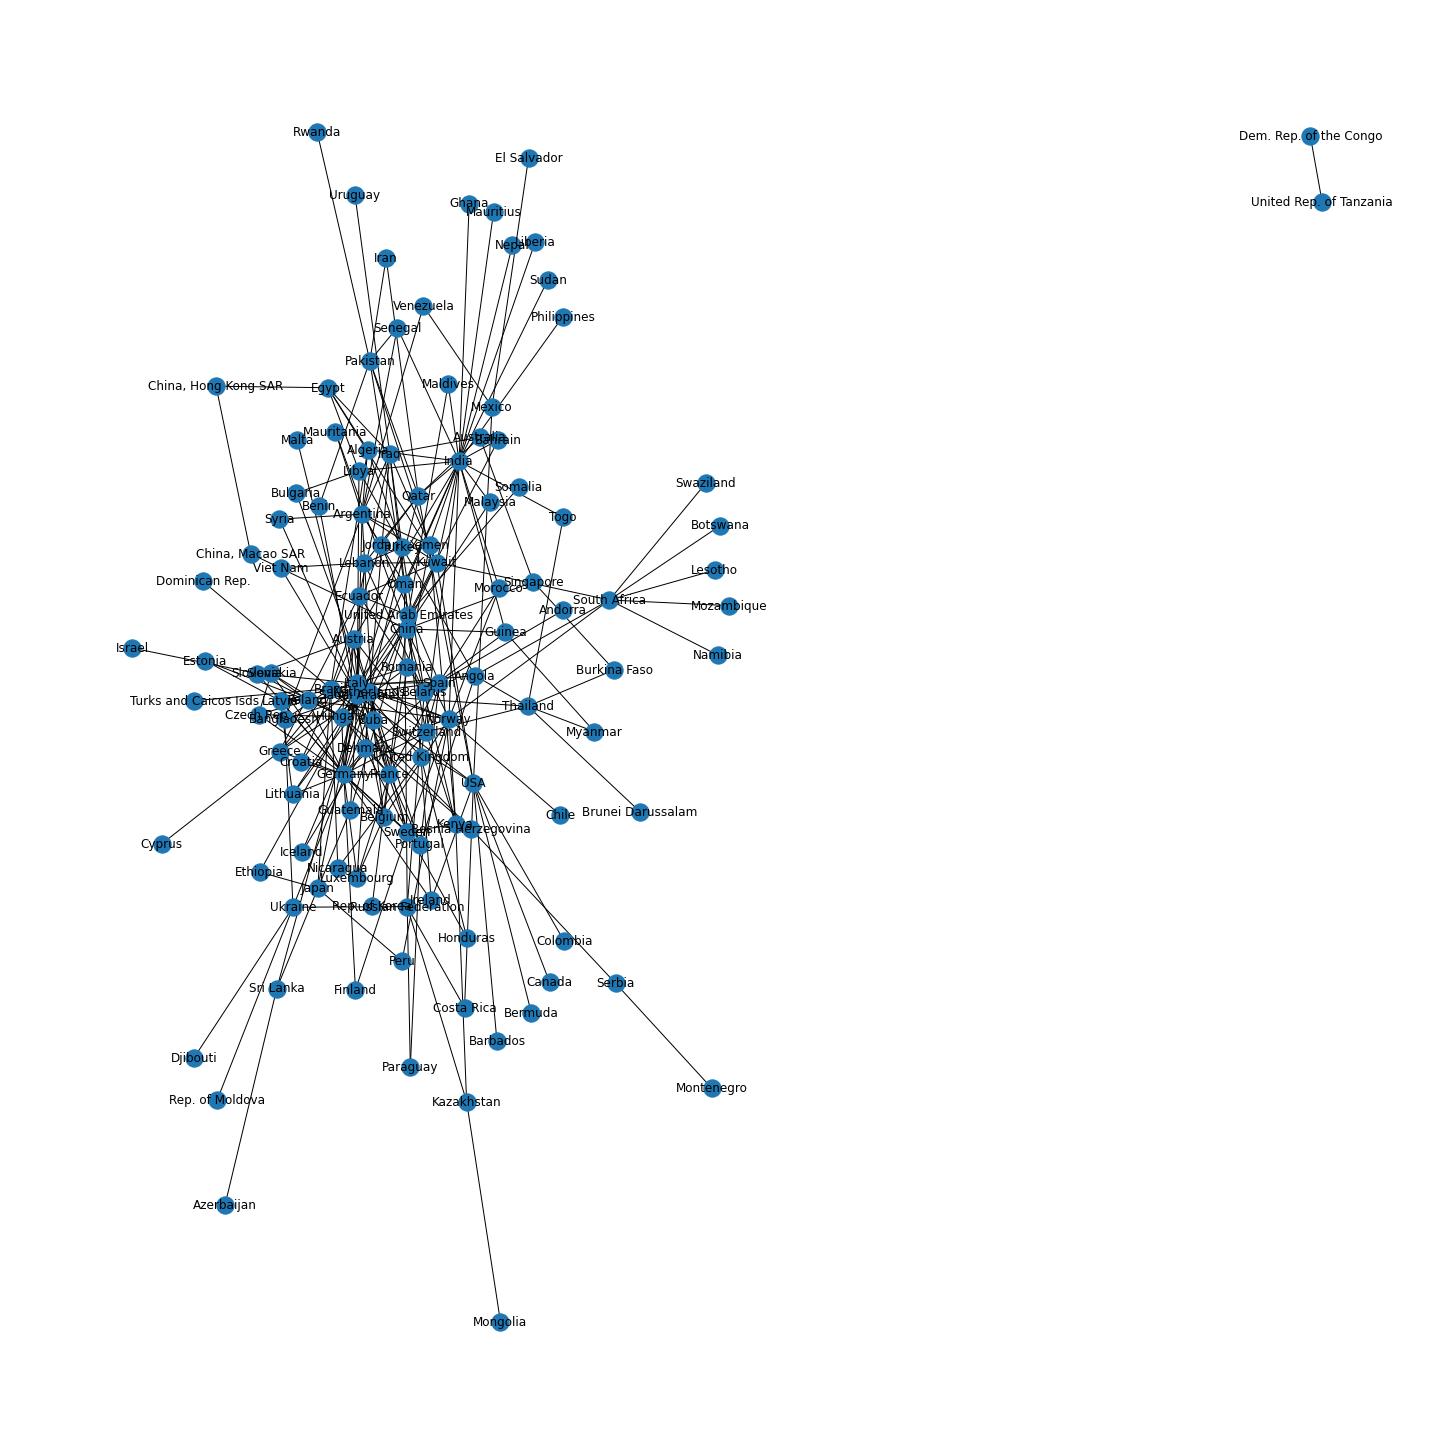

In [92]:
plt.figure(figsize=(20,20))
nx.draw(G_,with_labels=True)
plt.show()

✏️ 9. Agregar a los nodos del grafo los atributos de: 
* Color en base a la variable color
* Size en base a la variable size
* Label en base a la variable pais

In [ ]:
 vertices.set_index('pais')['size'].to_dict()

In [136]:
# Generar Atributos
attr_dict_grupo = vertices.set_index('pais')['color'].to_dict()
nx.set_node_attributes(G_, 
                       values = attr_dict_grupo,
                       name = 'color')


attr_dict_grupo = vertices.set_index('pais')['size'].to_dict()
nx.set_node_attributes(G_, 
                       values = attr_dict_grupo,
                       name = 'size')

In [ ]:
G_.nodes(data=True)

In [139]:
#NODES
color_node=[i[1]['color'] for i in list(G_.nodes(data=True))]
size_node=[i[1]['size'] for i in list(G_.nodes(data=True))]

✏️ 10. Visualizar el grafo con los colores y tamaños generados como atributos

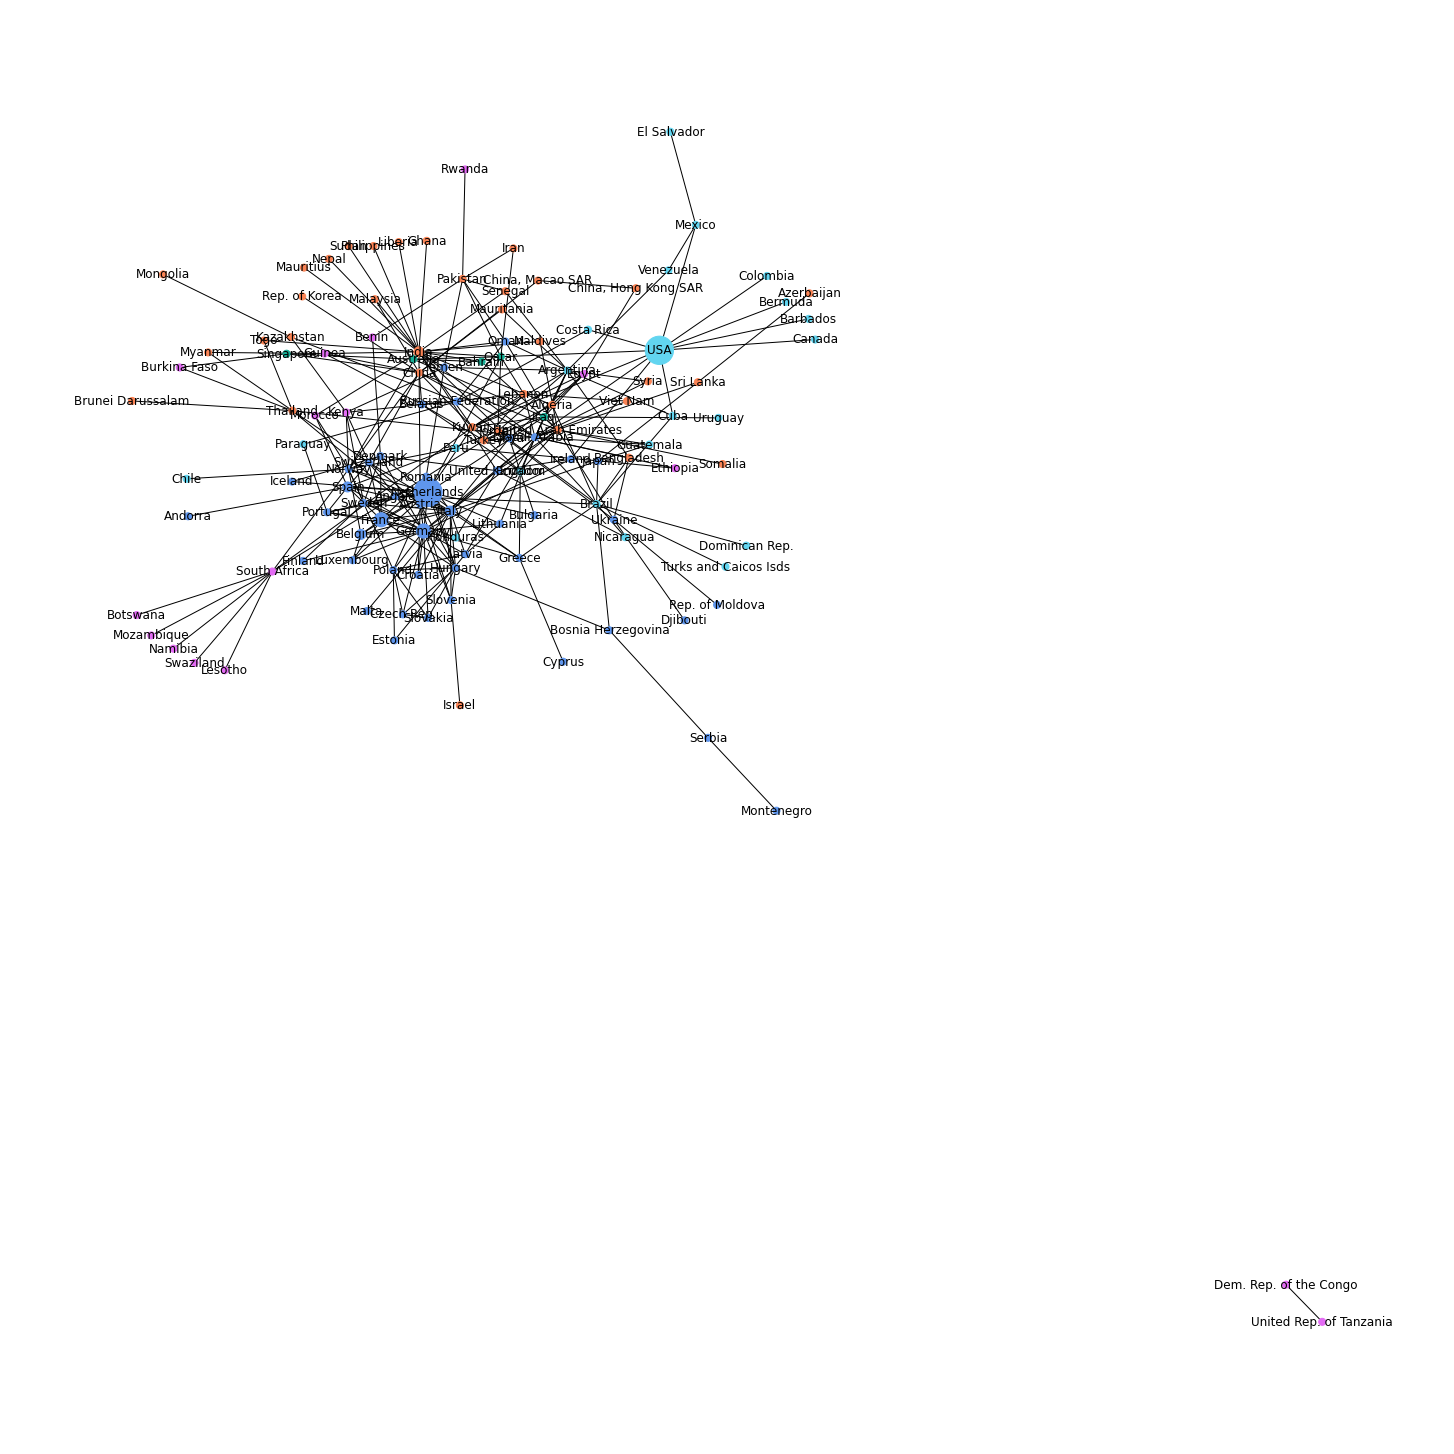

In [141]:
plt.figure(figsize=(20,20))
nx.draw(
        G_,
        with_labels=True,
        node_color= color_node,
        node_size= size_node,
        )
plt.show()

In [130]:
?nx.draw

### Componentes de un grafo


Si existen camimos entre cualquier vértice de un grafo y otro vértice, el grafo se dice que es **conexo**. 
No siempre deben existir caminos entre todos los vértices de un grafo. Si esto ocurre, aparecen **componentes** de un grafo (subgrafos). Por ejemplo, en el grafo a continuación se muestra un componente rojo. En este caso es un **componente gigante**, y una propiedad que suele cumplirse es que en un mismo grafo no suelen coexistir dos componentes gigantes ya que la aparicción de una conexión entre alguno de los vértices vincularía ambos componentes. 

<center>
<img src='https://users.dimi.uniud.it/~massimo.franceschet/teaching/datascience/network/img/randomGiant.png' alt='component' style='width:500px' />
</center>

✏️ 1. ¿Cuáles son los nodos del componente gigante?

Los podemos obtener con **connected_components** de networkx

In [96]:
cg=nx.connected_components(G_)

In [102]:
cg1=max(nx.connected_components(G_))
print('El componente gigante contiene',len(list(cg1)))

El componente gigante contiene 123


In [121]:
cg2=nx.connected_components(G_)
cg2=list(cg2)
cg2[1]

{'Dem. Rep. of the Congo', 'United Rep. of Tanzania'}

✏️ 2. Qué vecinos comparten España (Spain) y Italia (Italy)?

> overlap: vecinos en común o puente local (intersección)

In [129]:
nsp=list(G_.neighbors('Spain'))
nit=list(G_.neighbors('Italy'))
[ i for i in nsp if i in nit]

['France', 'Switzerland', 'Germany']